# Run this notebook from top to down. [Order Dependent]

### Question 2(without normalization)

Train the perceptron model on training data and use the model to classify test data.

In [1]:
# imports and configurations
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = (20,10)

data_file = "Dataset Question2.csv"
test_size = 0.2

max_itr = 123456

In [2]:
df = pd.read_csv(data_file, header=None)
num_features = df.columns.shape[0] - 1
X_train, X_test, y_train, y_test = train_test_split(df[list(range(4))].to_numpy(), df[4].add(0.1).astype(np.int).to_numpy(), test_size=0.2)

# Augmenting the data and mapping labels {0, 1} to {-1, +1}
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
y_train = y_train * 2 - 1

X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1, 1), X_test))
y_test = y_test * 2 - 1

# result data need to retrieve from model
zero_one_loss = []
itr_num = []
count_misclassified = []
tr_confusion_matrix = None
ts_confusion_matrix = None
weights = None

# perceptron learning
W = np.random.randn(X_train.shape[1])

converged = False
k = 0
sampling_idx = 1

while k < max_itr and not converged:
    Z = np.multiply(np.dot(X_train, W), y_train)

    idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
    if k == sampling_idx:
        sampling_idx *= 2
        zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
        count_misclassified.append(idx_misclassified.shape[0])
        itr_num.append(k)
        print("{}-th itr. weight: {}, zero-one-loss: {}".format(k, np.round(W / np.linalg.norm(W),3), zero_one_loss[-1]))

    converged = True

    for j in idx_misclassified:
        W = W + y_train[j] * X_train[j]
        converged = False
    k += 1

norm_W = W / np.linalg.norm(W)
print("Normalized weights at convergence is {}".format(np.round(norm_W,3)))

weights = norm_W

# final loss
Z = np.multiply(np.dot(X_train,W), y_train)
idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
count_misclassified.append(idx_misclassified.shape[0])
itr_num.append(k)

# building confusion matrix for train data
Y_pred = np.dot(X_train,W)
Y_Y_pred = np.multiply(y_train, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
tr_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# building confusion matrix for test data
Y_pred = np.dot(X_test,W)
Y_Y_pred = np.multiply(y_test, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
ts_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# finding accuracy on test data
Z = np.multiply(np.dot(X_test, W), y_test)
num_misclassified = np.argwhere(Z <= 0).reshape(-1).shape[0]
accuracy = round(100 * (1 - num_misclassified/y_test.shape[0]),2)
print("Test Count: {}\nMisclassified: {}\nTest Accuracy: {}%".format(y_test.shape[0], num_misclassified, accuracy))

1-th itr. weight: [-0.032 -0.315 -0.863  0.366  0.147], zero-one-loss: 0.3664539653600729
2-th itr. weight: [-0.023 -0.598 -0.786  0.151  0.03 ], zero-one-loss: 0.3154056517775752
4-th itr. weight: [ 0.027 -0.839 -0.39  -0.327 -0.192], zero-one-loss: 0.06381039197812215
8-th itr. weight: [ 0.079 -0.796 -0.364 -0.443 -0.175], zero-one-loss: 0.04557885141294439
16-th itr. weight: [ 0.178 -0.749 -0.397 -0.475 -0.157], zero-one-loss: 0.032816773017319965
32-th itr. weight: [ 0.32  -0.682 -0.424 -0.475 -0.164], zero-one-loss: 0.020054694621695533
64-th itr. weight: [ 0.424 -0.644 -0.401 -0.472 -0.148], zero-one-loss: 0.013673655423883319
128-th itr. weight: [ 0.484 -0.637 -0.37  -0.46  -0.106], zero-one-loss: 0.013673655423883319
256-th itr. weight: [ 0.536 -0.641 -0.329 -0.434 -0.073], zero-one-loss: 0.016408386508659983
512-th itr. weight: [ 0.552 -0.632 -0.328 -0.429 -0.063], zero-one-loss: 0.014585232452142206
1024-th itr. weight: [ 0.557 -0.632 -0.357 -0.399 -0.057], zero-one-loss: 0.0

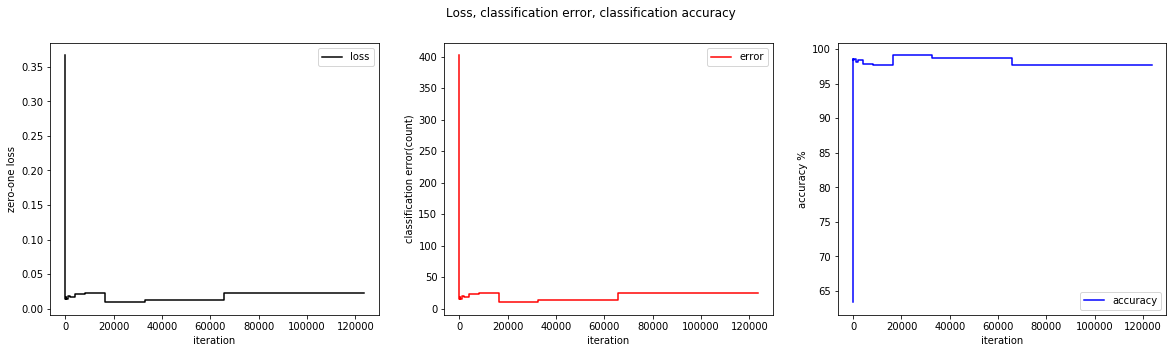

In [3]:
loss = np.array(zero_one_loss)
error = np.array(count_misclassified)
accuracy_percent = (1-loss)*100

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,5)
fig.suptitle('Loss, classification error, classification accuracy')

ax[0].step(itr_num, loss, 'k-', label='loss')
ax[0].set_ylabel('zero-one loss')
ax[0].set_xlabel('iteration')

ax[1].step(itr_num, error, 'r-', label='error')
ax[1].set_ylabel('classification error(count)')
ax[1].set_xlabel('iteration')

ax[2].step(itr_num, accuracy_percent, 'b-', label='accuracy')
ax[2].set_ylabel('accuracy %')
ax[2].set_xlabel('iteration')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

### Confusion Matrix

True positive: Actual positive, predicted positive

True negative: Actual negative, predicted negative

False positive: Actual negative, predicted positive

False negative: Actual positive, predicted negative

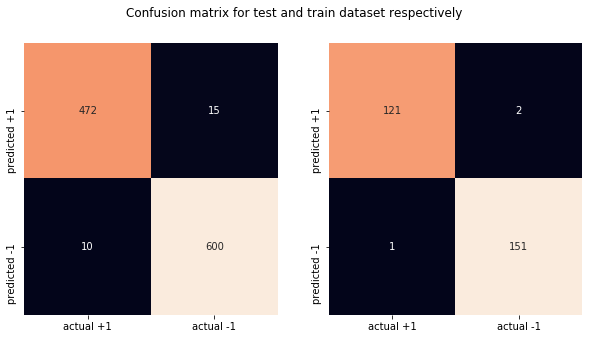

In [4]:
xtick_label = ['actual +1', 'actual -1']
ytick_label = ['predicted +1', 'predicted -1']

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
fig.suptitle('Confusion matrix for test and train dataset respectively')

sns.heatmap(tr_confusion_matrix, annot=True, ax=ax[0], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)
sns.heatmap(ts_confusion_matrix, annot=True, ax=ax[1], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)

In [5]:
print("Normalized weights: {}".format(weights))

Normalized weights: [ 0.55547296 -0.63619058 -0.38969641 -0.36315413 -0.0544713 ]


### Question 2(with normalization)

Normalize the training data using MinMaxScalar. Train the perceptron model on normalized data and use the model to classify test data. Compare this model with the above model.

In [6]:
df = pd.read_csv(data_file, header=None)
num_features = df.columns.shape[0] - 1
X_train, X_test, y_train, y_test = train_test_split(df[list(range(4))].to_numpy(), df[4].add(0.1).astype(np.int).to_numpy(), test_size=0.2)

# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Augmenting the data and mapping labels {0, 1} to {-1, +1}
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
y_train = y_train * 2 - 1

X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1, 1), X_test))
y_test = y_test * 2 - 1

# result data need to retrieve from model
zero_one_loss = []
itr_num = []
count_misclassified = []
tr_confusion_matrix = None
ts_confusion_matrix = None
weights = None

# perceptron learning
W = np.random.randn(X_train.shape[1])

converged = False
k = 0
sampling_idx = 1

while k < max_itr and not converged:
    Z = np.multiply(np.dot(X_train, W), y_train)

    idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
    if k == sampling_idx:
        sampling_idx *= 2
        zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
        count_misclassified.append(idx_misclassified.shape[0])
        itr_num.append(k)
        print("{}-th itr. weight: {}, zero-one-loss: {}".format(k, np.round(W / np.linalg.norm(W),3), zero_one_loss[-1]))

    converged = True

    for j in idx_misclassified:
        W = W + y_train[j] * X_train[j]
        converged = False
    k += 1

norm_W = W / np.linalg.norm(W)
print("Normalized weights at convergence is {}".format(np.round(norm_W,3)))

weights = norm_W

# final loss
Z = np.multiply(np.dot(X_train,W), y_train)
idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
zero_one_loss.append(idx_misclassified.shape[0] / Z.shape[0])
count_misclassified.append(idx_misclassified.shape[0])
itr_num.append(k)

# building confusion matrix for train data
Y_pred = np.dot(X_train,W)
Y_Y_pred = np.multiply(y_train, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_train[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_train[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
tr_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# building confusion matrix for test data
Y_pred = np.dot(X_test,W)
Y_Y_pred = np.multiply(y_test, Y_pred)
true_idx = np.where(Y_Y_pred > 0)
neg_idx = np.where(Y_Y_pred < 0)
tp = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
fp = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
fn = np.where(y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
tn = np.where(y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
ts_confusion_matrix = np.array([[tp, fp], [fn, tn]])

# finding accuracy on test data
Z = np.multiply(np.dot(X_test, W), y_test)
num_misclassified = np.argwhere(Z <= 0).reshape(-1).shape[0]
accuracy = round(100 * (1 - num_misclassified/y_test.shape[0]),2)
print("Test Count: {}\nMisclassified: {}\nTest Accuracy: {}%".format(y_test.shape[0], num_misclassified, accuracy))

1-th itr. weight: [-0.642 -0.431 -0.435 -0.169 -0.431], zero-one-loss: 0.43846855059252504
2-th itr. weight: [-0.39  -0.682 -0.55  -0.014 -0.284], zero-one-loss: 0.43846855059252504
4-th itr. weight: [-0.391 -0.681 -0.549 -0.013 -0.286], zero-one-loss: 0.43846855059252504
8-th itr. weight: [-0.056 -0.835 -0.52   0.061 -0.161], zero-one-loss: 0.43846855059252504
16-th itr. weight: [ 0.463 -0.796 -0.341  0.144  0.123], zero-one-loss: 0.14858705560619873
32-th itr. weight: [ 0.437 -0.822 -0.357  0.016  0.08 ], zero-one-loss: 0.195077484047402
64-th itr. weight: [ 0.546 -0.753 -0.263 -0.235  0.099], zero-one-loss: 0.07748404740200547
128-th itr. weight: [ 0.561 -0.633 -0.297 -0.437  0.074], zero-one-loss: 0.023701002734731084
256-th itr. weight: [ 0.582 -0.532 -0.383 -0.478  0.051], zero-one-loss: 0.015496809480401094
512-th itr. weight: [ 0.603 -0.458 -0.431 -0.491 -0.004], zero-one-loss: 0.009115770282588878
1024-th itr. weight: [ 0.614 -0.431 -0.443 -0.49  -0.032], zero-one-loss: 0.0091

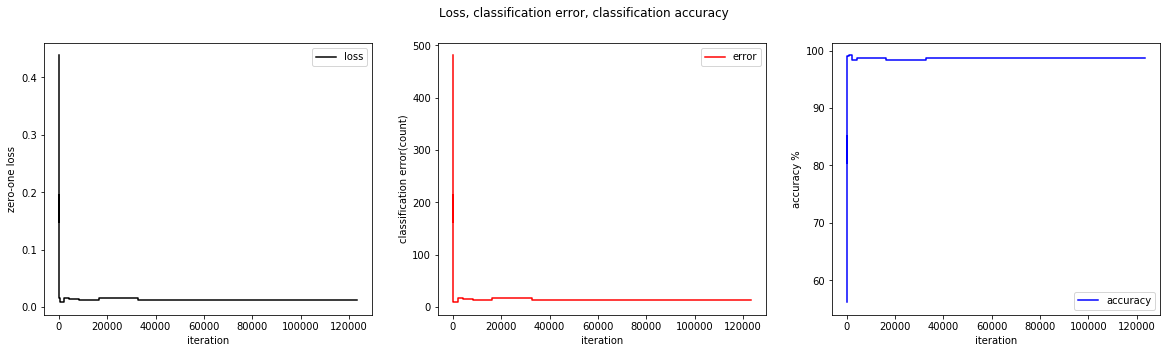

In [7]:
loss = np.array(zero_one_loss)
error = np.array(count_misclassified)
accuracy_percent = (1-loss)*100

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,5)
fig.suptitle('Loss, classification error, classification accuracy')

ax[0].step(itr_num, loss, 'k-', label='loss')
ax[0].set_ylabel('zero-one loss')
ax[0].set_xlabel('iteration')

ax[1].step(itr_num, error, 'r-', label='error')
ax[1].set_ylabel('classification error(count)')
ax[1].set_xlabel('iteration')

ax[2].step(itr_num, accuracy_percent, 'b-', label='accuracy')
ax[2].set_ylabel('accuracy %')
ax[2].set_xlabel('iteration')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

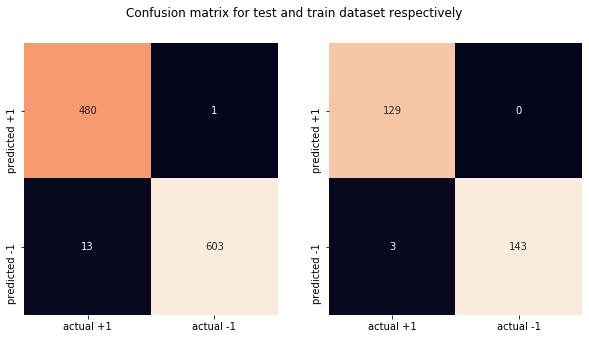

In [8]:
xtick_label = ['actual +1', 'actual -1']
ytick_label = ['predicted +1', 'predicted -1']

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
fig.suptitle('Confusion matrix for test and train dataset respectively')

sns.heatmap(tr_confusion_matrix, annot=True, ax=ax[0], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)
sns.heatmap(ts_confusion_matrix, annot=True, ax=ax[1], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)

In [9]:
print("Normalized weights: {}".format(weights))

Normalized weights: [ 0.61629757 -0.42722564 -0.44553487 -0.4883331  -0.02617284]


### Conclusion

The results are almost same for both of the cases [normalized and un-normalized].